In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
from math import floor
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

In [2]:
ride_columns = ['accepted_driver_id', 'created_at', 'passenger_id', 'source_lat',
       'source_lng', 'destination_lat', 'destination_lng', 'eta', 'provider',
       'ata', 'id', 'city']

khatkesh_columns = ['ride_id','driver_id','a_t_a_result.arrival_a_t_a','a_t_a_result.boarding_a_t_a','a_t_a_result.ride_a_t_a','a_t_a_result.arrival_probe_result.probe.point.lat','a_t_a_result.arrival_probe_result.probe.point.lon','a_t_a_result.arrival_probe_result.probe.timestamp','a_t_a_result.arrival_probe_result.confidence','a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level','a_t_a_result.boarding_probe_result.probe.point.lat','a_t_a_result.boarding_probe_result.probe.point.lon','a_t_a_result.boarding_probe_result.probe.timestamp','a_t_a_result.boarding_probe_result.confidence','a_t_a_result.boarding_probe_result.h3_index','a_t_a_result.boarding_probe_result.k_ring_level','a_t_a_result.final_destination_probe_result.probe.point.lat','a_t_a_result.final_destination_probe_result.probe.point.lon','a_t_a_result.final_destination_probe_result.probe.timestamp','a_t_a_result.final_destination_probe_result.confidence','a_t_a_result.final_destination_probe_result.h3_index','a_t_a_result.final_destination_probe_result.k_ring_level','a_t_a_result.destination_probe_result.probe.point.lat','a_t_a_result.destination_probe_result.probe.point.lon','a_t_a_result.destination_probe_result.probe.timestamp','a_t_a_result.destination_probe_result.confidence','a_t_a_result.destination_probe_result.h3_index','a_t_a_result.destination_probe_result.k_ring_level','a_t_a_result.extra_destination_probe_result.probe.point.lat','a_t_a_result.extra_destination_probe_result.probe.point.lon','a_t_a_result.extra_destination_probe_result.probe.timestamp','a_t_a_result.extra_destination_probe_result.confidence','a_t_a_result.extra_destination_probe_result.h3_index','a_t_a_result.extra_destination_probe_result.k_ring_level','pickup_a_d_d_result.distance','pickup_a_d_d_result.confidence','pickup_a_d_d_result.route_ratio','pickup_a_d_d_result.g_p_s_ratio','ride_a_d_d_result.distance','ride_a_d_d_result.confidence','ride_a_d_d_result.route_ratio','ride_a_d_d_result.g_p_s_ratio','total_a_d_d_confidence','in_ride_allotment','e_d_d','clickhouse_time','hash']

train_dates = ['2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10']

train_holidays = ['2022-08-07', '2022-08-08']

test_dates = ['2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
              '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
              '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
              '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
              '2022-10-09']

test_holidays = ['2022-09-17', '2022-09-25', '2022-09-27', '2022-10-05']

In [3]:
train = pd.read_csv('../rides_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063341 entries, 0 to 4063340
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [5]:
test = pd.read_csv('../rides_test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729988 entries, 0 to 2729987
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [6]:
train_p1 = train[train['eta'] < 600]
train_p1

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
0,877165,2022-08-02 11:56:47,36215892,35.750870,51.502956,35.745010,51.516491,304,smapp-same-dc,195,...,0.041667,3.002,0.909061,0.0,0.791667,0.933463,0.0,0.000,2022-08-02 12:07:29,6961707030052570014
3,97781,2022-08-02 16:39:54,55660849,35.725231,51.300682,35.723122,51.305210,233,smapp-same-dc,225,...,0.029412,1.867,0.829941,0.0,0.264706,0.910896,0.0,0.000,2022-08-02 16:48:34,9945354151016190877
5,1116192,2022-08-02 15:38:04,3456452,35.744781,51.528484,35.729729,51.531853,431,smapp-same-dc,729,...,0.016393,4.652,1.000000,0.0,0.983607,1.000000,0.0,0.000,2022-08-02 15:53:10,16929517509647183986
6,485581,2022-08-02 09:01:44,311908,35.705517,51.432930,35.730019,51.432892,559,smapp-same-dc,597,...,0.017241,7.626,1.000000,0.0,1.000000,0.900000,0.0,0.000,2022-08-02 09:13:20,13419953368408951013
12,317478,2022-08-02 08:08:58,267068,35.700920,51.394260,35.702213,51.402920,233,smapp-same-dc,202,...,0.055556,2.470,1.000000,0.0,1.000000,1.000000,0.0,0.000,2022-08-02 08:14:56,16899282084104980555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063325,2842880,2022-09-10 12:07:11,57260680,35.636322,51.434673,35.610573,51.424847,505,smapp-same-dc,818,...,0.012658,10.128,0.739929,0.0,0.392405,0.788206,0.0,4.992,2022-09-10 12:24:20,14150289607591133719
4063326,804235,2022-09-10 17:33:19,12203,35.722374,51.433865,35.710262,51.419422,457,smapp-same-dc,550,...,0.017857,5.416,1.000000,0.0,1.000000,1.000000,0.0,2.711,2022-09-10 17:45:09,17496611204542180570
4063327,2513799,2022-09-10 17:25:48,35886635,35.529884,51.170605,35.525486,51.170727,294,smapp-same-dc,357,...,0.025000,3.224,1.000000,0.0,0.975000,1.000000,0.0,1.127,2022-09-10 17:40:10,7186325782204005604
4063334,2637494,2022-09-10 19:12:38,23174481,35.722000,51.338257,35.725792,51.329330,363,smapp-same-dc,422,...,0.024390,2.736,0.917763,0.0,0.902439,0.958081,0.0,1.338,2022-09-10 19:26:44,6830501910090186471


In [7]:
test_p1 = test[test['eta'] < 600]
test_p1

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
2,3270241,2022-09-11 10:12:52,156453,35.762264,51.469757,35.799660,51.488323,592,smapp-same-dc,1072,...,0.009174,14.476,1.000000,0.0,0.990826,1.000000,0.0,6.246,2022-09-11 10:36:05,2163352292095652828
5,4281163,2022-09-11 23:27:00,51379288,35.743633,51.519817,35.749561,51.500668,356,smapp-same-dc,812,...,0.008621,5.663,0.559332,0.0,0.413793,0.664275,0.0,4.978,2022-09-11 23:48:23,17579443734212930345
19,4159545,2022-09-11 07:06:04,41773576,35.793346,51.451591,35.785149,51.422890,384,smapp-same-dc,453,...,0.021739,9.512,1.000000,0.0,0.978261,1.000000,0.0,5.016,2022-09-11 07:20:11,2958239260763026093
25,2625758,2022-09-11 14:39:04,52459255,35.728420,51.514042,35.750904,51.535759,412,smapp-same-dc,415,...,0.026316,9.150,1.000000,0.0,1.000000,1.000000,0.0,4.596,2022-09-11 14:49:02,6310107200708324263
27,3428257,2022-09-11 12:55:32,14506561,35.697266,51.484016,35.713406,51.502598,553,smapp-same-dc,593,...,0.012658,3.994,0.609414,0.0,0.113924,0.548473,0.0,3.056,2022-09-11 13:10:36,12604091507334037704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729970,2270223,2022-10-09 08:31:35,47027632,35.681213,51.246330,35.694923,51.241165,374,smapp-same-dc,328,...,0.040000,4.622,1.000000,0.0,1.000000,1.000000,0.0,3.012,2022-10-09 09:53:50,13769286275287275685
2729975,470587,2022-10-09 07:01:17,18169908,35.711250,51.401794,35.723923,51.384476,376,smapp-same-dc,402,...,0.025641,6.812,1.000000,0.0,1.000000,1.000000,0.0,3.381,2022-10-09 07:16:56,8093986234901313127
2729977,1918086,2022-10-09 11:57:53,19373518,35.729649,51.415077,35.750629,51.411564,457,smapp-same-dc,1223,...,0.007519,3.008,0.500000,0.0,0.015038,0.680587,0.0,2.959,2022-10-09 12:22:29,959881536225758032
2729982,4155893,2022-10-09 21:45:38,45817892,35.613960,51.454670,35.612125,51.445740,219,smapp-same-dc,318,...,0.031250,3.664,1.000000,0.0,0.656250,1.000000,0.0,2.142,2022-10-09 21:54:04,8684864164647837727


There are some duplicates in the data

In [8]:
train_p1 = train_p1.drop_duplicates(subset=['ride_id', 'ata'])
len(train_p1)

1364741

In [9]:
test_p1 = test_p1.drop_duplicates(subset=['ride_id', 'ata'])
len(test_p1)

936251

In [10]:
train_p1 = train_p1[train_p1['a_t_a_result.ride_a_t_a'] < 10800]
train_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1363862.0,...,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06,1.363862e+06
mean,1.876455e+06,2.436136e+07,3.568353e+01,5.140934e+01,3.568379e+01,5.140931e+01,3.811992e+02,4.307175e+02,4.822548e+09,1.0,...,2.843318e-04,2.406144e-02,5.224891e+00,8.921958e-01,1.420436e-04,7.645571e-01,8.998900e-01,8.808653e-02,7.172905e-01,9.219638e+18
std,1.430118e+06,1.777012e+07,1.025050e-01,1.555006e-01,1.027548e-01,1.554055e-01,1.321498e+02,2.243583e+02,6.065505e+07,0.0,...,1.500045e-02,1.851864e-02,3.958688e+00,1.790440e-01,5.150780e-03,3.291998e-01,1.675789e-01,5.777673e-01,1.515658e+00,5.324766e+18
min,0.000000e+00,8.000000e+00,3.520510e+01,5.090053e+01,3.518570e+01,5.089928e+01,1.000000e+00,1.200000e+02,4.714478e+09,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.262369e+12
25%,4.204550e+05,5.723615e+06,3.564761e+01,5.133445e+01,3.564745e+01,5.133467e+01,2.790000e+02,2.790000e+02,4.770574e+09,1.0,...,0.000000e+00,1.587302e-02,2.876000e+00,8.571663e-01,0.000000e+00,6.363636e-01,8.769802e-01,0.000000e+00,0.000000e+00,4.611708e+18
50%,1.776114e+06,2.524845e+07,3.571851e+01,5.141148e+01,3.571887e+01,5.141167e+01,3.880000e+02,4.040000e+02,4.823592e+09,1.0,...,0.000000e+00,2.173913e-02,4.530000e+00,1.000000e+00,0.000000e+00,9.433962e-01,1.000000e+00,0.000000e+00,0.000000e+00,9.217192e+18
75%,3.192464e+06,3.885628e+07,3.574897e+01,5.147558e+01,3.574960e+01,5.147581e+01,4.930000e+02,5.380000e+02,4.871599e+09,1.0,...,0.000000e+00,3.030303e-02,6.840000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.383166e+19
max,4.330375e+06,5.737925e+07,3.583978e+01,5.283151e+01,3.583842e+01,5.283873e+01,5.990000e+02,7.784000e+03,4.933913e+09,1.0,...,1.000000e+00,1.000000e+00,1.358126e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.143216e+01,5.736200e+01,1.844674e+19


In [11]:
train_p1 = train_p1[(train_p1['a_t_a_result.destination_probe_result.confidence'] > 0) & (train_p1['a_t_a_result.boarding_probe_result.confidence'] > 0)]
train_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,8.437590e+05,8.437590e+05,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,8.437590e+05,843759.0,...,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,843759.000000,8.437590e+05
mean,1.914860e+06,2.421103e+07,35.684577,51.408187,35.684896,51.408108,382.587925,448.061414,4.822570e+09,1.0,...,0.000086,0.027955,5.549146,0.955018,0.000053,0.895119,0.959022,0.091294,0.734463,9.222740e+18
std,1.439299e+06,1.771111e+07,0.101835,0.154770,0.102103,0.154714,130.918244,227.840831,6.071848e+07,0.0,...,0.007230,0.017958,3.705438,0.117144,0.002200,0.204700,0.099115,0.585779,1.537912,5.322296e+18
min,0.000000e+00,8.000000e+00,35.205097,50.900532,35.206097,50.900829,1.000000,120.000000,4.714478e+09,1.0,...,0.000000,0.001359,0.000000,0.000000,0.000000,0.010811,0.000000,0.000000,0.000000,1.078058e+13
25%,4.440240e+05,5.622166e+06,35.649014,51.333889,35.648701,51.334089,281.000000,297.000000,4.770370e+09,1.0,...,0.000000,0.018519,3.170000,1.000000,0.000000,0.900000,0.975914,0.000000,0.000000,4.617185e+18
50%,1.845799e+06,2.506016e+07,35.719391,51.410847,35.720039,51.410877,389.000000,422.000000,4.822972e+09,1.0,...,0.000000,0.023810,4.898000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.219620e+18
75%,3.248996e+06,3.859238e+07,35.749424,51.475513,35.750256,51.475664,493.000000,554.000000,4.872142e+09,1.0,...,0.000000,0.033333,7.240000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.382581e+19
max,4.329836e+06,5.737755e+07,35.838963,52.802536,35.837082,52.838730,599.000000,7784.000000,4.933913e+09,1.0,...,1.000000,1.000000,1068.883545,1.000000,1.000000,1.000000,1.000000,41.432156,57.362000,1.844668e+19


In [12]:
test_p1 = test_p1[(test_p1['a_t_a_result.destination_probe_result.confidence'] > 0) & (test_p1['a_t_a_result.boarding_probe_result.confidence'] > 0)]
test_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,5.884100e+05,5.884100e+05,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,5.884100e+05,588410.0,...,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,588410.000000,5.884100e+05
mean,1.978384e+06,2.478777e+07,35.682344,51.409312,35.682675,51.409233,381.458345,452.324813,5.010210e+09,1.0,...,0.000096,0.028138,5.632927,0.955664,0.000055,0.899655,0.959267,0.023544,3.078062,9.209850e+18
std,1.473872e+06,1.796270e+07,0.102882,0.159306,0.103122,0.159304,131.395254,237.361025,4.376449e+07,0.0,...,0.008204,0.019715,3.381135,0.116989,0.002145,0.201518,0.099522,0.201079,1.726586,5.330276e+18
min,0.000000e+00,1.300000e+02,35.205868,50.900505,35.213226,50.900726,1.000000,120.000000,4.933925e+09,1.0,...,0.000000,0.001387,0.000000,0.000000,0.000000,0.010753,0.000000,0.000000,0.173000,5.378828e+13
25%,4.695440e+05,6.012403e+06,35.645489,51.333378,35.645462,51.333520,280.000000,298.000000,4.972380e+09,1.0,...,0.000000,0.018519,3.186000,1.000000,0.000000,0.909091,0.977223,0.000000,1.794000,4.590248e+18
50%,1.912062e+06,2.566380e+07,35.718117,51.411407,35.718479,51.411381,388.000000,424.000000,5.011546e+09,1.0,...,0.000000,0.023810,4.948000,1.000000,0.000000,1.000000,1.000000,0.000000,2.732000,9.191414e+18
75%,3.346453e+06,3.938941e+07,35.748581,51.477428,35.749249,51.477467,492.000000,556.000000,5.048421e+09,1.0,...,0.000000,0.033333,7.370750,1.000000,0.000000,1.000000,1.000000,0.000000,4.004000,1.383388e+19
max,4.422331e+06,5.814016e+07,35.836830,52.831242,35.839584,52.806419,599.000000,7755.000000,5.083667e+09,1.0,...,1.000000,1.000000,379.803192,1.000000,0.361546,1.000000,1.000000,22.886000,31.106001,1.844673e+19


In [13]:
train_p1 = train_p1[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
train_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
5,431,729,602,2022-08-02 15:38:04,35.744781,51.528484,35.729729,51.531853,0.000,2022-08-02 15:53:10
6,559,597,577,2022-08-02 09:01:44,35.705517,51.432930,35.730019,51.432892,0.000,2022-08-02 09:13:20
12,233,202,180,2022-08-02 08:08:58,35.700920,51.394260,35.702213,51.402920,0.000,2022-08-02 08:14:56
15,431,411,400,2022-08-02 11:50:24,35.546227,51.237129,35.520523,51.229996,0.000,2022-08-02 12:07:29
25,384,495,516,2022-08-02 17:02:58,35.564880,51.235130,35.558201,51.246475,0.000,2022-08-02 17:17:52
...,...,...,...,...,...,...,...,...,...,...
4063320,408,444,412,2022-09-10 15:09:14,35.783802,51.389996,35.772121,51.380386,3.643,2022-09-10 15:22:09
4063324,546,649,629,2022-09-10 15:55:57,35.690353,51.245808,35.711006,51.269897,6.066,2022-09-10 16:09:37
4063325,505,818,790,2022-09-10 12:07:11,35.636322,51.434673,35.610573,51.424847,4.992,2022-09-10 12:24:20
4063326,457,550,556,2022-09-10 17:33:19,35.722374,51.433865,35.710262,51.419422,2.711,2022-09-10 17:45:09


In [14]:
test_p1 = test_p1[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
test_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
5,356,812,997,2022-09-11 23:27:00,35.743633,51.519817,35.749561,51.500668,4.978,2022-09-11 23:48:23
25,412,415,380,2022-09-11 14:39:04,35.728420,51.514042,35.750904,51.535759,4.596,2022-09-11 14:49:02
31,296,379,417,2022-09-11 09:32:56,35.735615,51.487965,35.738064,51.505764,1.898,2022-09-11 09:47:10
37,533,669,356,2022-09-11 21:28:48,35.734512,51.527157,35.749210,51.525215,3.348,2022-09-11 21:55:12
41,504,464,439,2022-09-11 11:47:35,35.731098,51.531830,35.739254,51.549610,3.025,2022-09-11 12:00:50
...,...,...,...,...,...,...,...,...,...,...
2729950,240,208,200,2022-10-09 19:26:02,35.755978,51.479710,35.749355,51.480152,0.945,2022-10-09 19:33:00
2729956,346,453,424,2022-10-09 20:59:14,35.530865,51.401257,35.548965,51.401653,2.699,2022-10-09 21:10:57
2729970,374,328,244,2022-10-09 08:31:35,35.681213,51.246330,35.694923,51.241165,3.012,2022-10-09 09:53:50
2729975,376,402,388,2022-10-09 07:01:17,35.711250,51.401794,35.723923,51.384476,3.381,2022-10-09 07:16:56


In [15]:
train_p1['hour'] = train_p1.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
train_p1['holiday'] = train_p1.apply(lambda row: int(row.created_at.split()[0] in train_holidays), axis=1)
train_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
5,431,729,602,2022-08-02 15:38:04,35.744781,51.528484,35.729729,51.531853,0.000,2022-08-02 15:53:10,87.634444,0
6,559,597,577,2022-08-02 09:01:44,35.705517,51.432930,35.730019,51.432892,0.000,2022-08-02 09:13:20,81.028889,0
12,233,202,180,2022-08-02 08:08:58,35.700920,51.394260,35.702213,51.402920,0.000,2022-08-02 08:14:56,80.149444,0
15,431,411,400,2022-08-02 11:50:24,35.546227,51.237129,35.520523,51.229996,0.000,2022-08-02 12:07:29,83.840000,0
25,384,495,516,2022-08-02 17:02:58,35.564880,51.235130,35.558201,51.246475,0.000,2022-08-02 17:17:52,89.049444,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4063320,408,444,412,2022-09-10 15:09:14,35.783802,51.389996,35.772121,51.380386,3.643,2022-09-10 15:22:09,15.153889,0
4063324,546,649,629,2022-09-10 15:55:57,35.690353,51.245808,35.711006,51.269897,6.066,2022-09-10 16:09:37,15.932500,0
4063325,505,818,790,2022-09-10 12:07:11,35.636322,51.434673,35.610573,51.424847,4.992,2022-09-10 12:24:20,12.119722,0
4063326,457,550,556,2022-09-10 17:33:19,35.722374,51.433865,35.710262,51.419422,2.711,2022-09-10 17:45:09,17.555278,0


In [16]:
test_p1['hour'] = test_p1.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
test_p1['holiday'] = test_p1.apply(lambda row: int(row.created_at.split()[0] in test_holidays), axis=1)
test_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
5,356,812,997,2022-09-11 23:27:00,35.743633,51.519817,35.749561,51.500668,4.978,2022-09-11 23:48:23,47.450000,0
25,412,415,380,2022-09-11 14:39:04,35.728420,51.514042,35.750904,51.535759,4.596,2022-09-11 14:49:02,38.651111,0
31,296,379,417,2022-09-11 09:32:56,35.735615,51.487965,35.738064,51.505764,1.898,2022-09-11 09:47:10,33.548889,0
37,533,669,356,2022-09-11 21:28:48,35.734512,51.527157,35.749210,51.525215,3.348,2022-09-11 21:55:12,45.480000,0
41,504,464,439,2022-09-11 11:47:35,35.731098,51.531830,35.739254,51.549610,3.025,2022-09-11 12:00:50,35.793056,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2729950,240,208,200,2022-10-09 19:26:02,35.755978,51.479710,35.749355,51.480152,0.945,2022-10-09 19:33:00,44.433889,0
2729956,346,453,424,2022-10-09 20:59:14,35.530865,51.401257,35.548965,51.401653,2.699,2022-10-09 21:10:57,45.987222,0
2729970,374,328,244,2022-10-09 08:31:35,35.681213,51.246330,35.694923,51.241165,3.012,2022-10-09 09:53:50,33.526389,0
2729975,376,402,388,2022-10-09 07:01:17,35.711250,51.401794,35.723923,51.384476,3.381,2022-10-09 07:16:56,32.021389,0


In [17]:
train_p1_x = train_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
train_p1_y = train_p1["a_t_a_result.ride_a_t_a"]

In [18]:
test_p1_x = test_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
test_p1_y = test_p1["a_t_a_result.ride_a_t_a"]

In [19]:
train_p1_y

5          602
6          577
12         180
15         400
25         516
          ... 
4063320    412
4063324    629
4063325    790
4063326    556
4063339    300
Name: a_t_a_result.ride_a_t_a, Length: 843759, dtype: int64

In [20]:
eta_ata_hour = pd.DataFrame(train_p1_x[["eta", "hour"]])
eta_ata_hour["ata"] = train_p1_y
eta_ata_hour["hour"] = eta_ata_hour['hour'] % 24
eta_ata_hour

,eta,hour,ata
5,431,15.634444,602
6,559,9.028889,577
12,233,8.149444,180
15,431,11.840000,400
25,384,17.049444,516
...,...,...,...
4063320,408,15.153889,412
4063324,546,15.932500,629
4063325,505,12.119722,790
4063326,457,17.555278,556


In [21]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=1000, min_samples=1000).fit(eta_ata_hour)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
labels = db.labels_

In [ ]:
set(labels)

In [ ]:


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(eta_ata_hour, labels))

In [ ]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
unique_labels

In [ ]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
colors

In [ ]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = eta_ata_hour[class_member_mask & core_samples_mask]
    # print(xy['eta'])
    plt.plot(
        xy['hour'],
        xy['eta'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = eta_ata_hour[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['hour'],
        xy['eta'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [40]:
nine_thirteen_x = train_p1_x[(train_p1_x['hour'] > 7) & (train_p1_x['hour'] < 16)]
nine_thirteen_y = train_p1_y[(train_p1_x['hour'] > 7) & (train_p1_x['hour'] < 16)]

In [26]:
import seaborn as sns

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

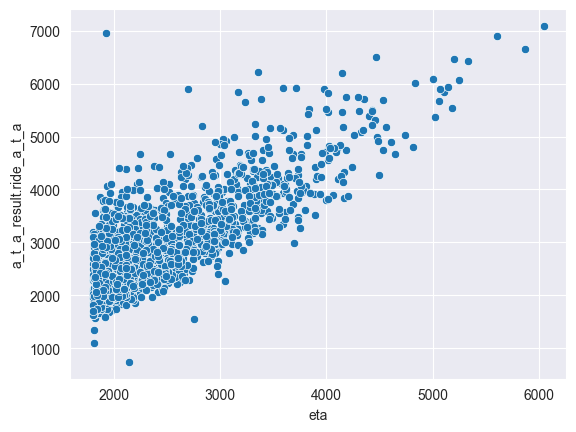

In [39]:
sns.scatterplot(x=nine_thirteen_x['eta'], y=nine_thirteen_y)

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

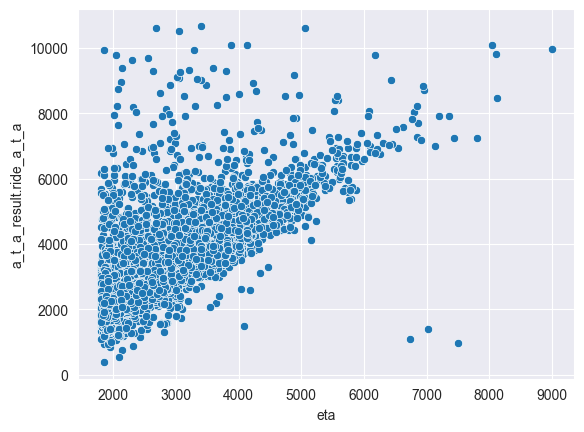

In [41]:
sns.scatterplot(x=nine_thirteen_x['eta'], y=nine_thirteen_y)

In [23]:
thirteen_fifteen_x = train_p1_x[(train_p1_x['hour'] > 13) & (train_p1_x['hour'] < 15)]
thirteen_fifteen_y = train_p1_y[(train_p1_x['hour'] > 13) & (train_p1_x['hour'] < 15)]

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

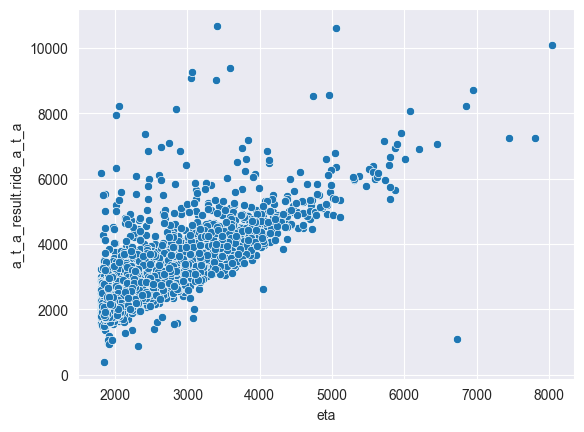

In [24]:
sns.scatterplot(x=thirteen_fifteen_x['eta'], y=thirteen_fifteen_y)

In [21]:
reg_p1 = LinearRegression().fit(train_p1_x, train_p1_y)

In [22]:
print(reg_p1.coef_)
print(reg_p1.intercept_)

[ 9.86317012e-01 -2.06494060e+01 -1.53886046e-01  1.05307889e+01
  2.86651104e+01 -2.48709853e-02  8.61168580e+00]
-1040.6923235978827


In [23]:
ata_train_pred = reg_p1.predict(train_p1_x)
ata_test_pred = reg_p1.predict(test_p1_x)

In [23]:
train_p1_x

,eta,source_lat,source_lng,destination_lat,destination_lng,hour,holiday
4,1295,35.760803,51.412613,35.680412,51.406525,80.567500,0
7,1721,35.551586,51.251617,35.647949,51.399227,79.957500,0
8,1230,35.417717,51.795067,35.465965,51.675755,86.506944,0
14,1641,35.768822,51.305519,35.765411,51.442303,87.170556,0
18,1390,35.730118,51.382473,35.758369,51.441551,83.147222,0
...,...,...,...,...,...,...,...
4063264,1712,35.669792,51.302319,35.685867,51.414448,12.414167,0
4063317,1565,35.310020,51.730579,35.423836,51.585243,13.378056,0
4063330,1301,35.720974,51.498474,35.708061,51.401943,14.291944,0
4063337,1239,35.724361,51.402294,35.794140,51.472240,15.712500,0


In [35]:
# known_h3_index = np.count_nonzero(rides_test_p1_x[:, 0:17], axis=1) == 2

In [36]:
# rides_test_p1_y = rides_test_p1_y[known_h3_index]
# rides_test_p1_x = rides_test_p1_x[known_h3_index]
# ata_test_pred = ata_test_pred[known_h3_index]

# Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='eta', ylabel='Count'>

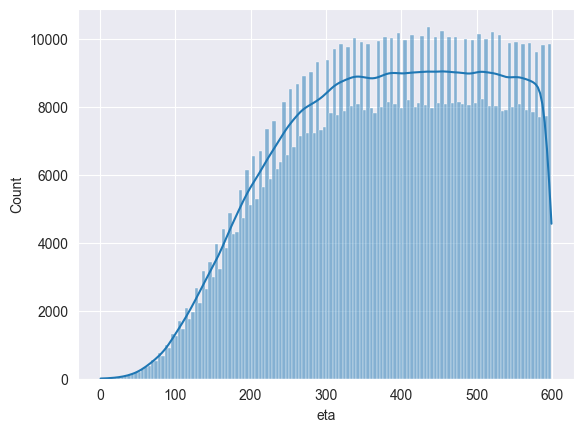

In [25]:
sns.histplot(data=train_p1_x['eta'], kde=True)

<AxesSubplot: ylabel='Count'>

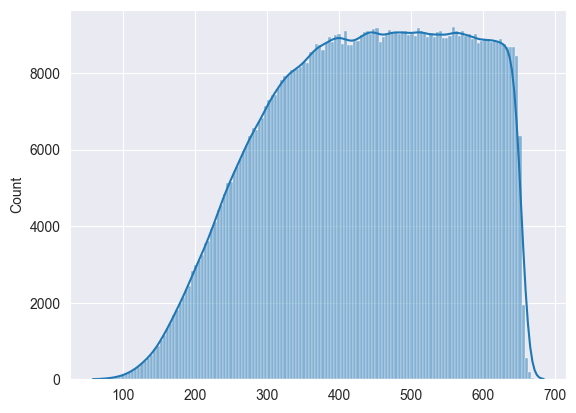

In [26]:
sns.histplot(data=ata_train_pred, kde=True)

In [35]:
train_p1_x[(train_p1_y - train_p1_x['eta']) > 3600]

,eta,source_lat,source_lng,destination_lat,destination_lng,hour,holiday
12636,1373,35.763805,51.336811,35.811848,51.406998,92.491111,0
14392,1752,35.684254,51.257740,35.705402,51.399704,81.103889,0
26927,1780,35.812378,51.415123,35.757259,51.301067,88.900833,0
38985,1679,35.699070,51.396088,35.739376,51.147438,79.508611,0
66433,1594,35.719784,51.388954,35.772945,51.445412,89.474444,0
...,...,...,...,...,...,...,...
3973274,1212,35.703621,51.459309,35.792671,51.467625,21.710000,0
3999677,1492,35.624367,51.403862,35.685665,51.363361,20.760833,0
4018195,1304,35.675854,51.364876,35.776340,51.355392,17.593333,0
4033657,1602,35.687630,51.376419,35.588570,51.313602,11.959167,0


In [36]:
train_p1_y[(train_p1_y - train_p1_x['eta']) > 3600]

12636       6853
14392       5789
26927       9338
38985      10723
66433       5384
           ...  
3973274     6237
3999677    10656
4018195     6708
4033657     5418
4051682     5930
Name: a_t_a_result.ride_a_t_a, Length: 487, dtype: int64

<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

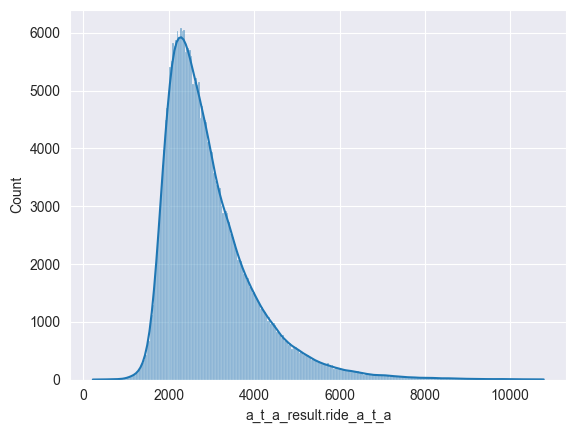

In [41]:
sns.histplot(data=train_p1_y, kde=True)

<AxesSubplot: ylabel='Count'>

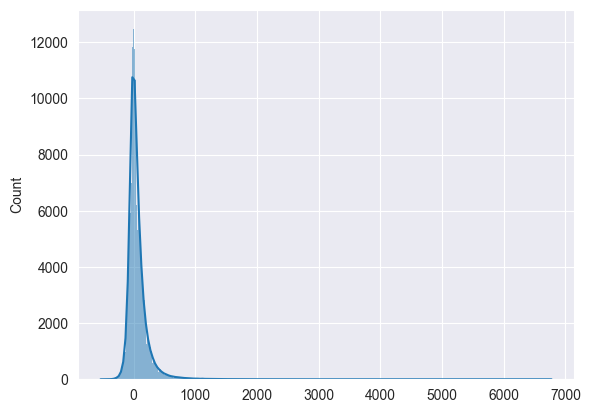

In [27]:
eta_err = train_p1_y - train_p1_x['eta']
sns.histplot(data=eta_err, kde=True)

In [43]:
a = eta_err[(eta_err > -500) & (eta_err < 500)]
len(a)

186551

In [44]:
eta_err.mean()

471.7199607438704

In [45]:
eta_err.std()

709.00384060888

In [46]:
eta_err.kurtosis()

11.142223253354231

In [47]:
eta_err.skew()

2.1029638642917448

<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

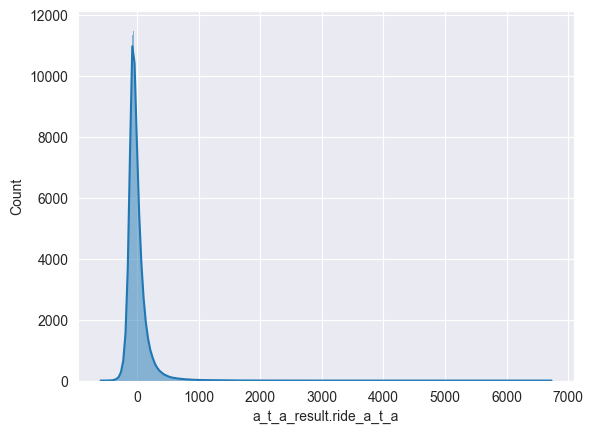

In [28]:
seldon_err = train_p1_y - ata_train_pred
sns.histplot(data=seldon_err, kde=True)

In [49]:
b = seldon_err[(seldon_err > -500) & (seldon_err < 500)]
len(b)

199804

In [50]:
seldon_err.mean()

-7.637347038913984e-12

In [51]:
seldon_err.std()

689.8999573234698

In [52]:
seldon_err.kurtosis()

13.045570989494358

In [53]:
seldon_err.skew()

1.901550841216248

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

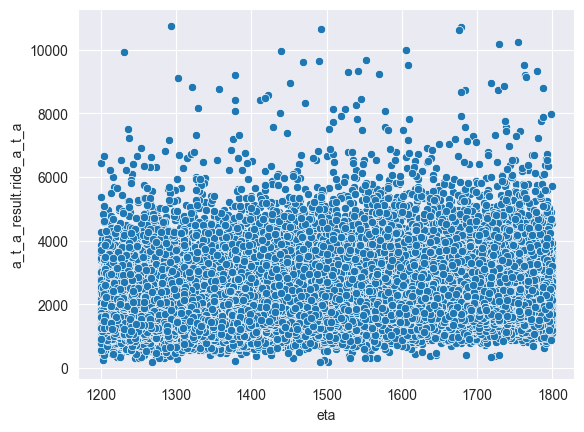

In [27]:
sns.scatterplot(x=train_p1_x['eta'], y=train_p1_y)

<AxesSubplot: ylabel='a_t_a_result.ride_a_t_a'>

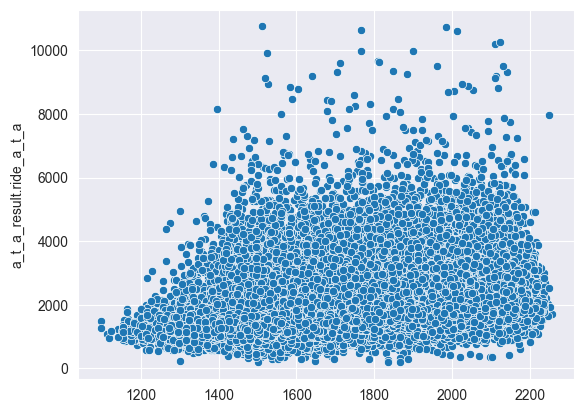

In [28]:
sns.scatterplot(x=ata_train_pred, y=train_p1_y)

In [123]:
outlier_eta = rides_train_p1_x['eta'][(rides_train_p1_x['eta'] > 6250) & (rides_train_p1_y < 4000)]
outlier_ata = rides_train_p1_y[(rides_train_p1_x['eta'] > 6250) & (rides_train_p1_y < 4000)]
outlier_pred = ata_train_pred[(rides_train_p1_x['eta'] > 6250) & (rides_train_p1_y < 4000)]
outlier_ride = rides_train_p1_x[(rides_train_p1_x['eta'] > 6250) & (rides_train_p1_y < 4000)]

In [124]:
d = {'eta': outlier_eta, 'ata': outlier_ata, 'pred': outlier_pred}
pd.DataFrame(data=d)

,eta,ata,pred
158455,7114,1001,8745.729117
333551,7643,1079,9319.776973
434776,6734,1100,8346.048872
445517,7026,1407,8669.618293
760548,8202,2020,10051.402871
847923,8493,1876,10350.302215
872346,7409,1100,9066.043229
888341,9227,3091,11365.293951
894858,7236,1004,8906.852976
1030983,8272,2087,10165.316572


In [128]:
rides_train_p1[(rides_train_p1_x['eta'] > 6250) & (rides_train_p1_y < 4000)]

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
158455,7114,1155,1001,2022-08-03 17:56:07,35.794132,51.393974,35.814293,51.399998,0.000000,2022-08-03 18:21:09,113.935278,0
333551,7643,1055,1079,2022-08-05 14:22:25,35.813282,51.398888,35.718025,51.366096,0.000000,2022-08-05 14:46:16,158.373611,0
434776,6734,768,1100,2022-08-06 14:01:08,35.821125,51.399765,35.795277,51.409946,0.000000,2022-08-06 14:30:48,14.018889,0
445517,7026,1295,1407,2022-08-06 09:28:56,35.745487,51.408741,35.819874,51.405060,0.000000,2022-08-06 09:54:44,9.482222,0
760548,8202,2083,2020,2022-08-10 17:48:20,35.731846,51.592602,35.813473,51.398758,0.000000,2022-08-10 18:30:49,113.805556,0
847923,8493,1954,1876,2022-08-11 16:25:27,35.813400,51.398651,35.748043,51.188271,0.000000,2022-08-11 17:03:44,136.424167,0
872346,7409,1126,1100,2022-08-12 00:38:56,35.813488,51.398724,35.738499,51.430252,0.000000,2022-08-12 01:01:54,144.648889,0
888341,9227,3117,3091,2022-08-12 02:44:13,35.813446,51.398731,35.741875,51.823124,0.000000,2022-08-12 03:51:45,146.736944,0
894858,7236,1222,1004,2022-08-12 05:05:30,35.813499,51.398720,35.823856,51.465538,0.000000,2022-08-12 05:33:01,149.091667,0
1030983,8272,2121,2087,2022-08-13 21:15:55,35.716354,51.460400,35.813435,51.398624,0.000000,2022-08-13 21:59:28,21.265278,0


In [126]:
outlier_ride

,eta,source_lat,source_lng,destination_lat,destination_lng,hour,holiday
158455,7114,35.794132,51.393974,35.814293,51.399998,113.935278,0
333551,7643,35.813282,51.398888,35.718025,51.366096,158.373611,0
434776,6734,35.821125,51.399765,35.795277,51.409946,14.018889,0
445517,7026,35.745487,51.408741,35.819874,51.405060,9.482222,0
760548,8202,35.731846,51.592602,35.813473,51.398758,113.805556,0
847923,8493,35.813400,51.398651,35.748043,51.188271,136.424167,0
872346,7409,35.813488,51.398724,35.738499,51.430252,144.648889,0
888341,9227,35.813446,51.398731,35.741875,51.823124,146.736944,0
894858,7236,35.813499,51.398720,35.823856,51.465538,149.091667,0
1030983,8272,35.716354,51.460400,35.813435,51.398624,21.265278,0


<AxesSubplot: xlabel='hour', ylabel='eta'>

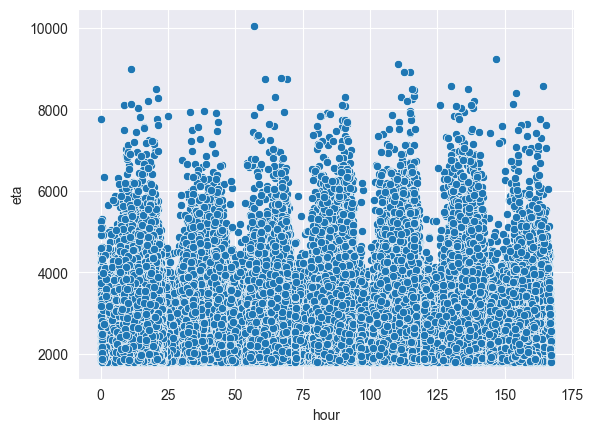

In [43]:
sns.scatterplot(x=rides_train_p1_x['hour'], y=rides_train_p1_x['eta'])

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

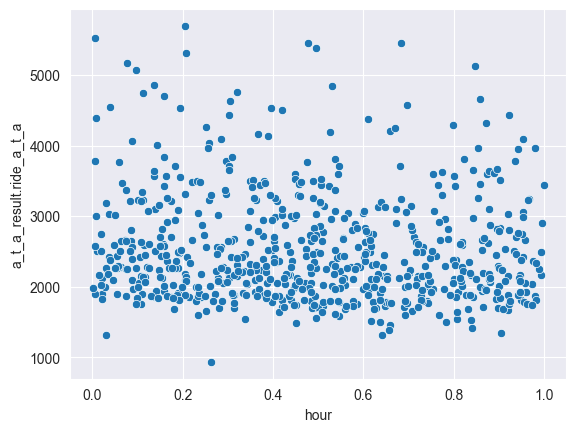

In [49]:
a = rides_train_p1_x[rides_train_p1_x['hour'] < 1]
b = rides_train_p1_y[rides_train_p1_x['hour'] < 1]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

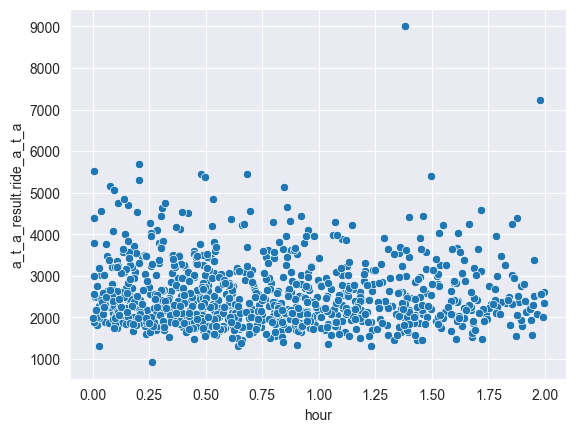

In [101]:
a = rides_train_p1_x[rides_train_p1_x['hour'] < 2]
b = rides_train_p1_y[rides_train_p1_x['hour'] < 2]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

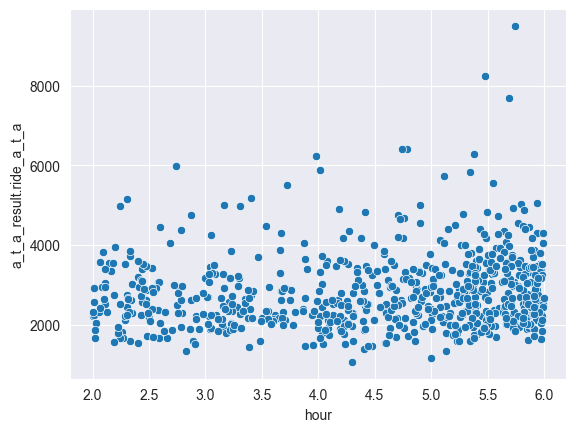

In [61]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 2) & (rides_train_p1_x['hour'] < 6)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 2) & (rides_train_p1_x['hour'] < 6)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

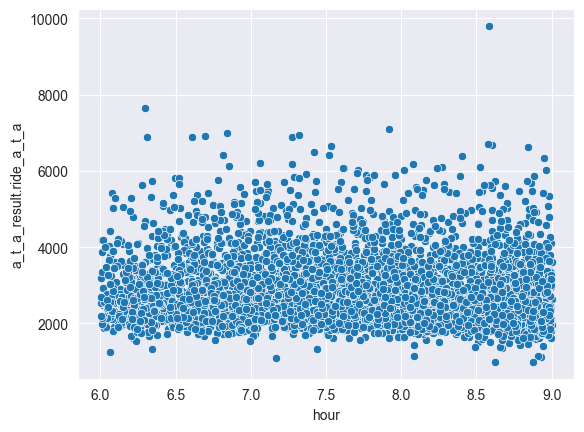

In [66]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 6) & (rides_train_p1_x['hour'] < 9)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 6) & (rides_train_p1_x['hour'] < 9)]
sns.scatterplot(x=a['hour'], y=b)

In [ ]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 6) & (rides_train_p1_x['hour'] < 9)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 6) & (rides_train_p1_x['hour'] < 9)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

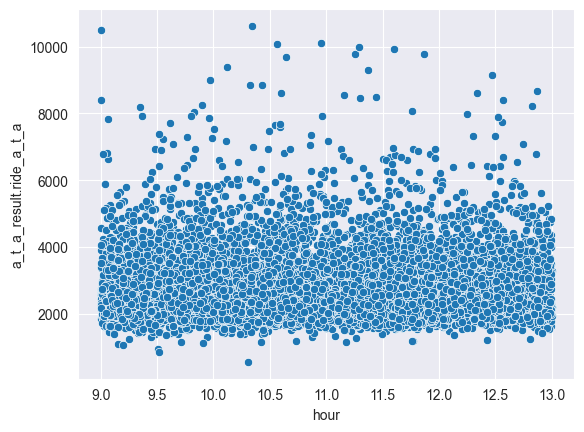

In [77]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 9) & (rides_train_p1_x['hour'] < 13)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 9) & (rides_train_p1_x['hour'] < 13)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

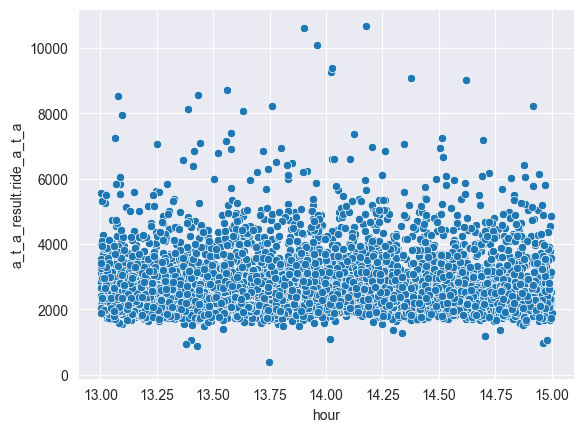

In [82]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 13) & (rides_train_p1_x['hour'] < 15)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 13) & (rides_train_p1_x['hour'] < 15)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

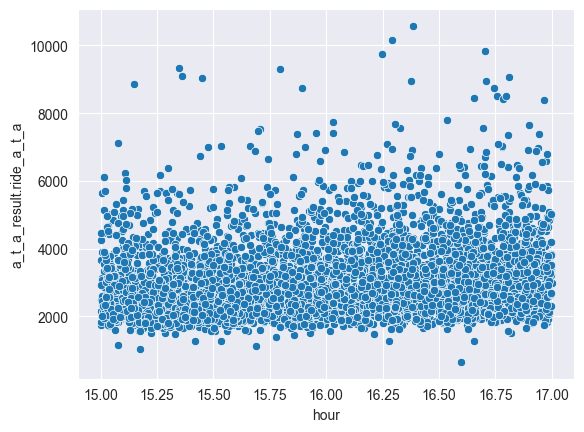

In [87]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 15) & (rides_train_p1_x['hour'] < 17)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 15) & (rides_train_p1_x['hour'] < 17)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

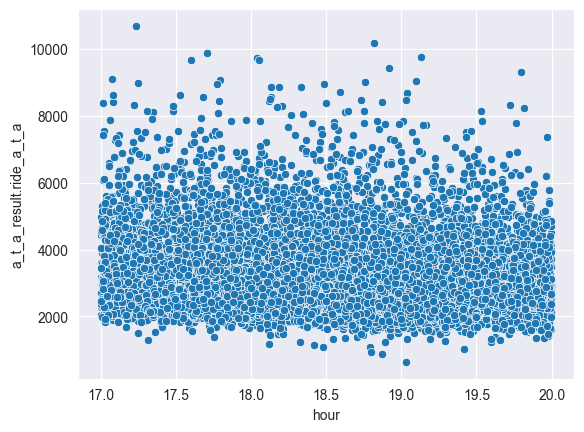

In [92]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 17) & (rides_train_p1_x['hour'] < 20)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 17) & (rides_train_p1_x['hour'] < 20)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

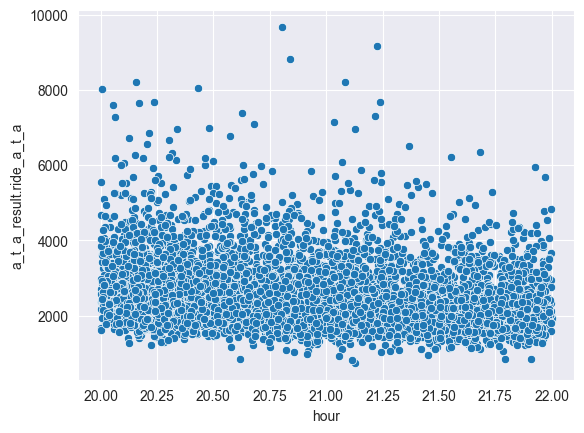

In [96]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 20) & (rides_train_p1_x['hour'] < 22)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 20) & (rides_train_p1_x['hour'] < 22)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

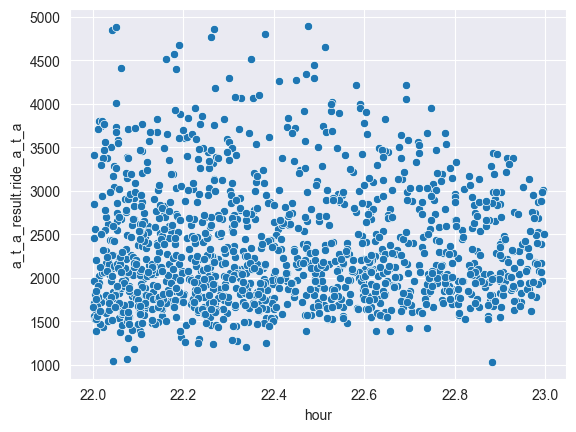

In [102]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 22) & (rides_train_p1_x['hour'] < 23)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 22) & (rides_train_p1_x['hour'] < 23)]
sns.scatterplot(x=a['hour'], y=b)

<AxesSubplot: xlabel='hour', ylabel='a_t_a_result.ride_a_t_a'>

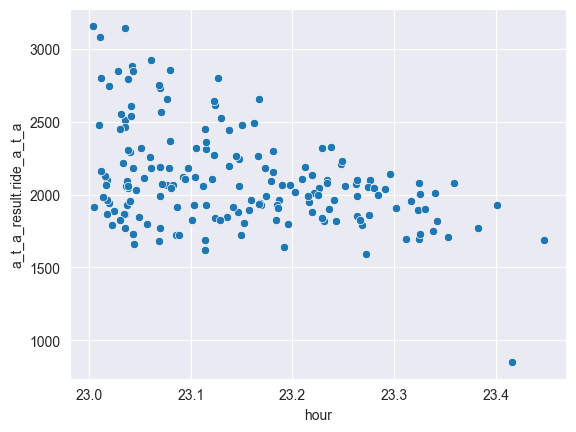

In [103]:
a = rides_train_p1_x[(rides_train_p1_x['hour'] > 23) & (rides_train_p1_x['hour'] < 24)]
b = rides_train_p1_y[(rides_train_p1_x['hour'] > 23) & (rides_train_p1_x['hour'] < 24)]
sns.scatterplot(x=a['hour'], y=b)

In [121]:
source = rides_train_p1_x[:, 0:7]
source_h3 = ['source_h3_4_842cd4bffffffff','source_h3_4_842cd59ffffffff','source_h3_4_842cf31ffffffff','source_h3_4_842cf33ffffffff','source_h3_4_842cf35ffffffff','source_h3_4_842cf37ffffffff','source_h3_4_842cf3dffffffff',]
source_num = 7

destination = rides_train_p1_x[:, 7:19]
destination_h3 = ['dest_h3_4_842cd4bffffffff','dest_h3_4_842cd59ffffffff','dest_h3_4_842cf01ffffffff','dest_h3_4_842cf05ffffffff','dest_h3_4_842cf07ffffffff','dest_h3_4_842cf27ffffffff','dest_h3_4_842cf31ffffffff','dest_h3_4_842cf33ffffffff','dest_h3_4_842cf35ffffffff','dest_h3_4_842cf37ffffffff','dest_h3_4_842cf39ffffffff','dest_h3_4_842cf3dffffffff']
destination_num = 12

etas = []
seldons = []
atas = []

h3_names = []

for s in range(source_num):
    for d in range(destination_num):
        index = (source[:, s] == 1) & (destination[:, d] == 1)
        etas.append(rides_train_p1_x[:, 19][index])
        seldons.append(ata_train_pred[index])
        atas.append(rides_train_p1_y[index])
        h3_names.append((source_h3[s], destination_h3[d]))


In [116]:
for e in etas:
    print(len(e))

0
4
0
0
1
0
138
2
76
79
3
22
5
1
0
1
4
0
798
70
45
53
4
45
158
672
131
71
1577
104
236816
8924
19419
7524
9083
55868
5
67
2
1
25
3
11712
79
266
243
63
457
105
31
6
5
163
28
21523
219
2161
1411
427
6368
120
63
2
3
87
22
9782
224
1559
997
104
1241
19
15
6
24
180
10
17271
138
2393
478
691
6748


<AxesSubplot: ylabel='Count'>

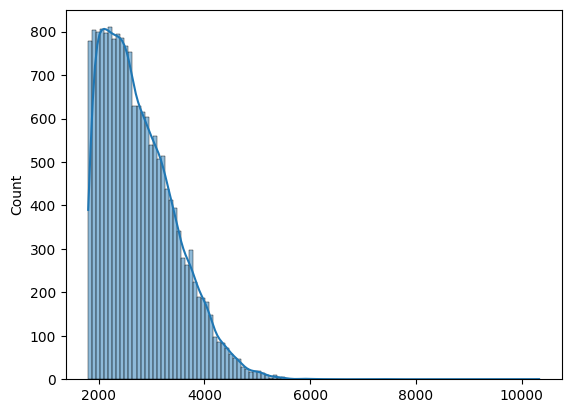

In [130]:
sns.histplot(data=etas[78], kde=True)

<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

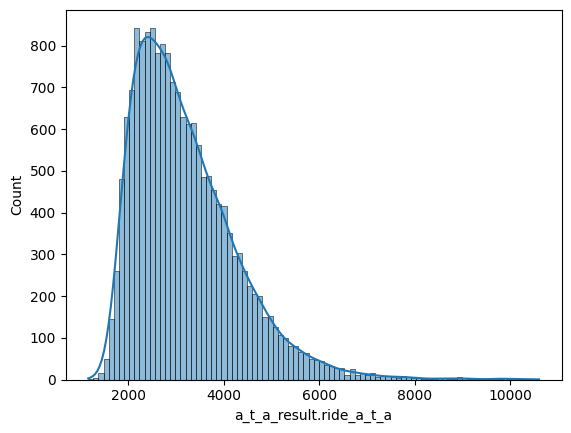

In [131]:
sns.histplot(data=atas[78], kde=True)

<AxesSubplot: ylabel='Count'>

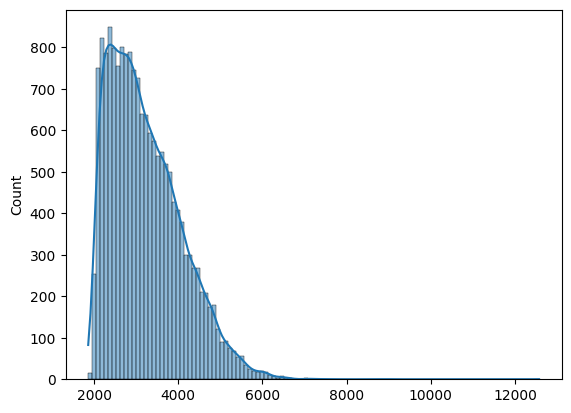

In [132]:
sns.histplot(data=seldons[78], kde=True)

In [133]:
h3_names[78]

('source_h3_4_842cf3dffffffff', 'dest_h3_4_842cf31ffffffff')

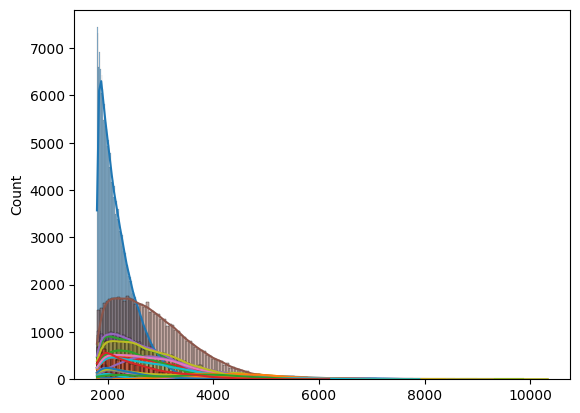

In [92]:
for d in distance:
    sns.histplot(data=d, kde=True)

<AxesSubplot: ylabel='Count'>

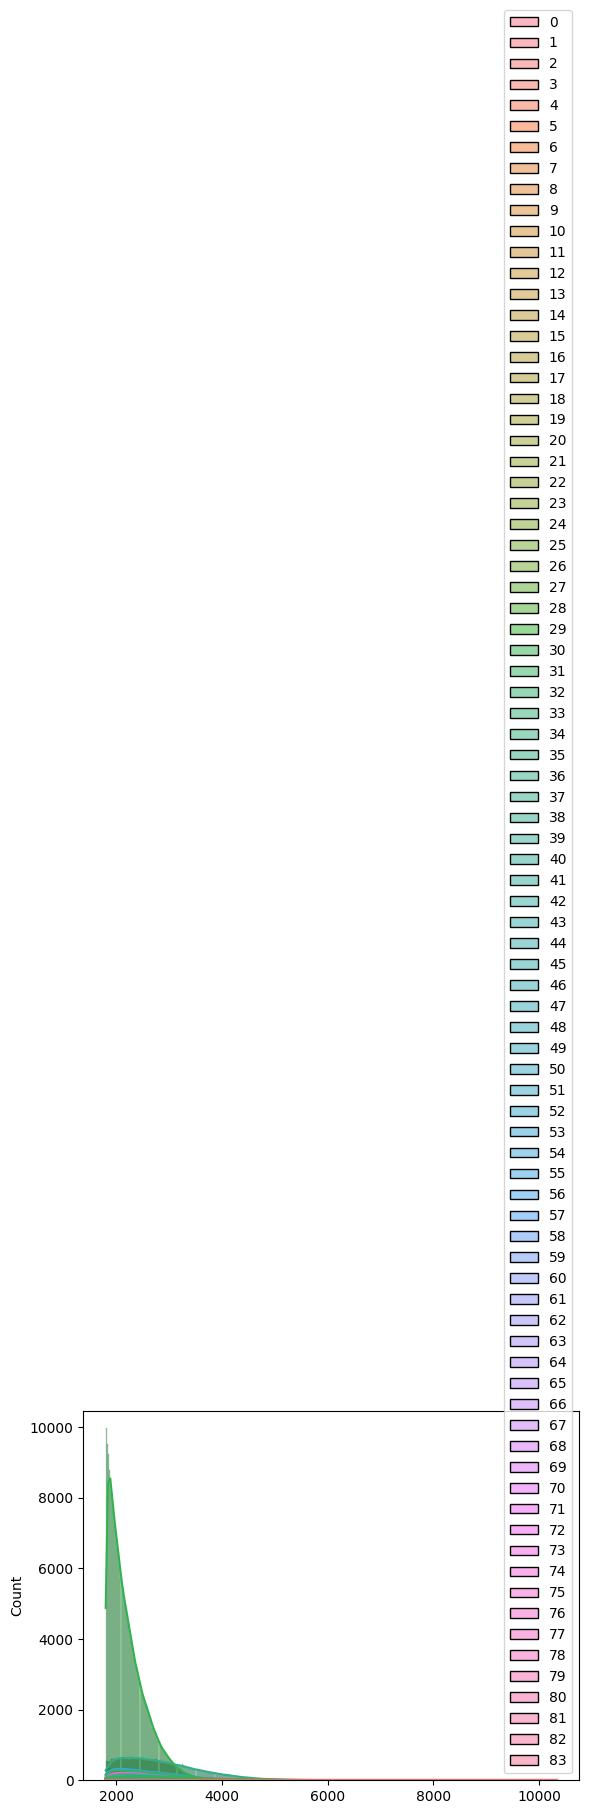

In [93]:
sns.histplot(data=distance, kde=True)

In [79]:
a = []
a.append([[1, 2, 3]])
a.append([[4, 5, 6]])
a

[[[1, 2, 3]], [[4, 5, 6]]]

In [41]:
eta = rides_train_p1_x[:, 19]

In [45]:
eta = np.sort(eta)
ata = np.sort(rides_train_p1_y)
seldon = np.sort(ata_train_pred)

In [48]:
eta['0']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<AxesSubplot: ylabel='Count'>

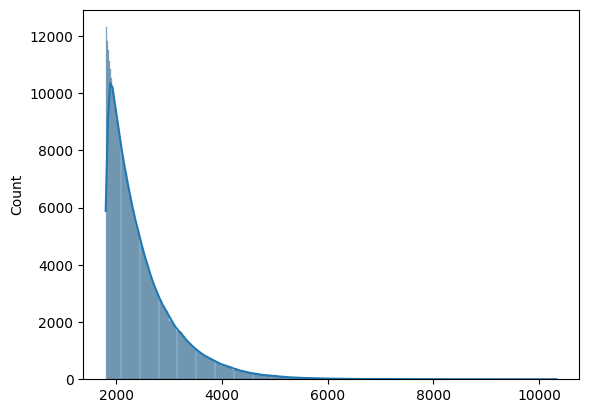

In [57]:
sns.histplot(data=eta, kde=True)

<AxesSubplot: ylabel='Count'>

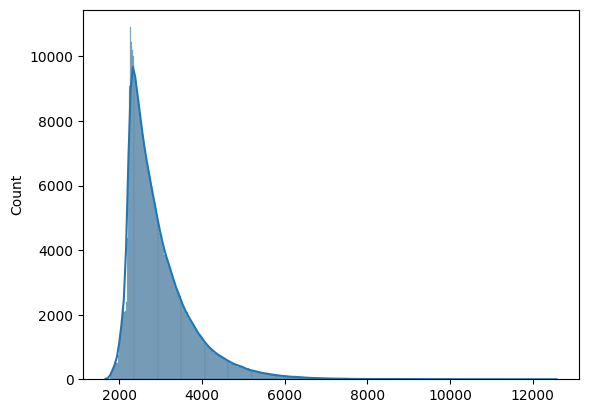

In [58]:
sns.histplot(data=seldon, kde=True)

<AxesSubplot: ylabel='Count'>

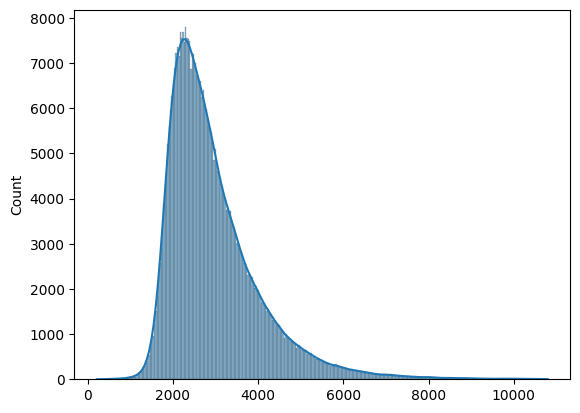

In [53]:
sns.histplot(data=ata, kde=True)

In [ ]:
plt.plot(eta)

In [ ]:
# %set_env AWS_ACCESS_KEY_ID=SokXIEc1g9vNqCJt4CSObyk6vumoOOPQ
# %set_env AWS_SECRET_ACCESS_KEY=QNyTpGhFjUTYSP9VKmfhpUizwKr0t8gk
# %set_env MLFLOW_S3_ENDPOINT_URL=https://minio-clustered-smapp-storage.apps.private.teh-1.snappcloud.io
#
# # create experiment
# %set_env MLFLOW_TRACKING_URI=https://mlflow.apps.private.okd4.teh-1.snappcloud.io/
# # mlflow experiments create --experiment-name elahe
#
# # run script under experiment
# %set_env MLFLOW_EXPERIMENT_NAME=elahe
# # cd save/
# # python test.py

In [ ]:
# ! echo $AWS_ACCESS_KEY_ID
# ! echo $AWS_SECRET_ACCESS_KEY
# ! echo $MLFLOW_S3_ENDPOINT_URL
# ! echo $MLFLOW_TRACKING_URI
# ! echo $MLFLOW_EXPERIMENT_NAME

In [ ]:
# with mlflow.start_run(run_name="regression") as run:
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=reg_p1,
#         artifact_path="regression",
#         registered_model_name="reg-model"
#     )

In [ ]:
# with mlflow.start_run(run_name="YOUR_RUN_NAME") as run:
#     params = {"n_estimators": 5, "random_state": 42}
#     sk_learn_rfr = RandomForestRegressor(**params)
#
#     # Log parameters and metrics using the MLflow APIs
#     mlflow.log_params(params)
#     mlflow.log_param("param_1", randint(0, 100))
#     mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})
#
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="sklearn-model",
#         registered_model_name="sk-learn-random-forest-reg-model"
#     )

# Outlier Detection

In [59]:
train_p1_x = rides_train_p1_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
test_p1_x = rides_test_p1_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]

In [60]:
train_p1_x_normalized = (train_p1_x - train_p1_x.min()) / (train_p1_x.max() - train_p1_x.min())
train_p1_y_normalized = (rides_train_p1_y - rides_train_p1_y.min()) / (rides_train_p1_y.max() - rides_train_p1_y.min())

In [61]:
test_p1_x_normalized = (test_p1_x - train_p1_x.min()) / (train_p1_x.max() - train_p1_x.min())
test_p1_y_normalized = (rides_test_p1_y - rides_train_p1_y.min()) / (rides_train_p1_y.max() - rides_train_p1_y.min())

In [62]:
from sklearn.neural_network import MLPRegressor

In [63]:
mlp_reg = MLPRegressor(random_state=73, max_iter=500).fit(train_p1_x_normalized, train_p1_y_normalized)

In [64]:
ata_train_pred_normalized = mlp_reg.predict(train_p1_x_normalized)
ata_test_pred_normalized = mlp_reg.predict(test_p1_x_normalized)

In [65]:
print("ETA train MAE", mean_absolute_error(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train MAE", mean_absolute_error(rides_train_p1_y, ata_train_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test MAE ", mean_absolute_error(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test MAE", mean_absolute_error(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA train MSE", mean_squared_error(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train MSE", mean_squared_error(rides_train_p1_y, ata_train_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test MSE ", mean_squared_error(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test MSE", mean_squared_error(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA train explained_variance_score", explained_variance_score(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train explained_variance_score", explained_variance_score(rides_train_p1_y,
                                                                            ata_train_pred_normalized * (
                                                                                        rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test explained_variance_score ", explained_variance_score(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test explained_variance_score", explained_variance_score(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA train median_absolute_error", median_absolute_error(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train median_absolute_error", median_absolute_error(rides_train_p1_y, ata_train_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test median_absolute_error ", median_absolute_error(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test median_absolute_error", median_absolute_error(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA train r2_score", r2_score(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train r2_score", r2_score(rides_train_p1_y, ata_train_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test r2_score ", r2_score(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test r2_score", r2_score(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA train MAPE", mean_absolute_percentage_error(rides_train_p1_y, rides_train_p1_x['eta']))
print("prediction train MAPE", mean_absolute_percentage_error(rides_train_p1_y, ata_train_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

print("ETA test MAPE ", mean_absolute_percentage_error(rides_test_p1_y, rides_test_p1_x['eta']))
print("prediction test MAPE", mean_absolute_percentage_error(rides_test_p1_y, ata_test_pred_normalized * (
            rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min()))

ETA train MAE 559.1245583685419
prediction train MAE 603.0770828452986
ETA test MAE  611.1913134725635
prediction test MAE 673.5149892226983
ETA train MSE 725204.4950297747
prediction train MSE 671057.6706377256
ETA test MSE  1011165.1235309173
prediction test MSE 949417.0203261642
ETA train explained_variance_score 0.5549098531235372
prediction train explained_variance_score 0.4083359132925177
ETA test explained_variance_score  0.49320343614291284
prediction test explained_variance_score 0.3637611672096456
ETA train median_absolute_error 354.0
prediction train median_absolute_error 484.7557930999835
ETA test median_absolute_error  353.0
prediction test median_absolute_error 519.0027832307928
ETA train r2_score 0.3578851158459555
prediction train r2_score 0.4058281196608762
ETA test r2_score  0.32205250961403575
prediction test r2_score 0.36345224802429343
ETA train MAPE 0.1669508370795257
prediction train MAPE 0.21384865902471006
ETA test MAPE  0.17309729335103807
prediction test MAPE

<AxesSubplot: ylabel='a_t_a_result.ride_a_t_a'>

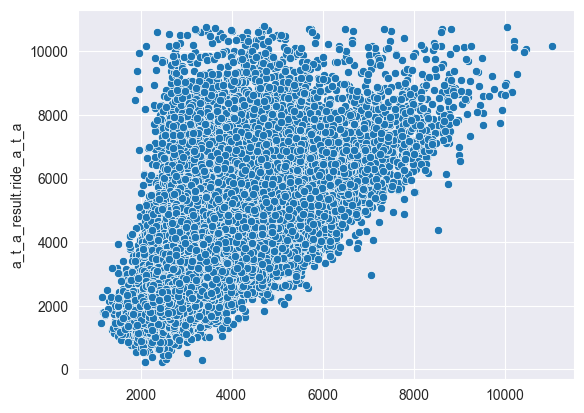

In [66]:
sns.scatterplot(x=ata_train_pred_normalized * (rides_train_p1_y.max() - rides_train_p1_y.min()) + rides_train_p1_y.min(),
                y=rides_train_p1_y)

In [67]:
eta = rides_train_p1_x['eta']
outlier_detecter_pred = ata_train_pred_normalized*(rides_train_p1_y.max()-rides_train_p1_y.min())+rides_train_p1_y.min()

In [70]:
distance = outlier_detecter_pred - eta

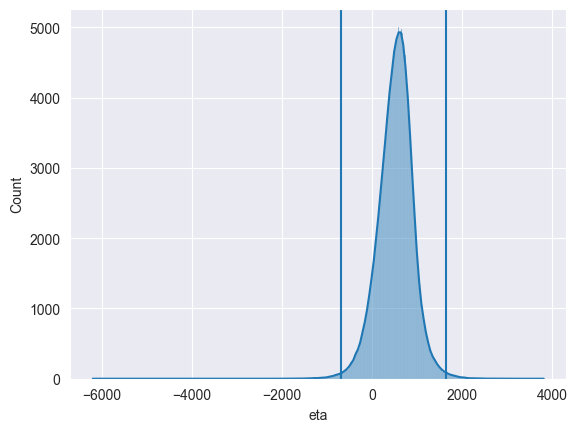

In [84]:
graph = sns.histplot(data=distance, kde=True)
graph.axvline(1638)
graph.axvline(-683)

In [81]:
np.quantile(distance, 0.005)

-683.9307466134358

In [82]:
np.quantile(distance, 0.995)

1638.8168763209019

In [83]:
len(distance) * 0.01

3005.9

In [80]:
len(distance)

300590

In [103]:
inside_eta = rides_train_p1_x['eta'][(distance > -3500) & (distance < 3500)]
inside_ata = rides_train_p1_y[(distance > -3500) & (distance < 3500)]

outside_eta = rides_train_p1_x['eta'][(distance < -3500) | (distance > 3500)]
outside_ata = rides_train_p1_y[(distance < -3500) | (distance > 3500)]

<AxesSubplot: xlabel='eta', ylabel='a_t_a_result.ride_a_t_a'>

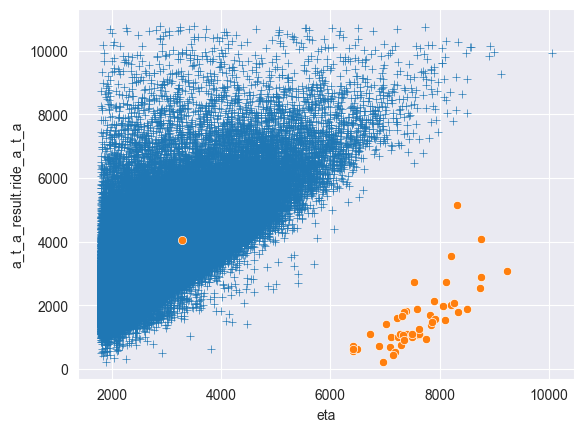

In [104]:
sns.scatterplot(x=inside_eta, y=inside_ata, marker="+")
sns.scatterplot(x=outside_eta, y=outside_ata, marker="o")